# Prawo Ohma dla prądu stałego

In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Inicjalizacja

In [2]:
# Wartości dla oporu drutowego
x_od = np.linspace(0, 1500, 16)
y_od = np.array([0, 11.2, 21.6, 33.4, 44.0, 54.4, 66.7, 77.1, 87.9, 99.6, 113.5, 121.7, 132.6, 143.5, 155.5, 166.0])

# Wartości dla diody prostowniczej
x_dp = np.array([1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
y_dp = np.array([570, 640, 674, 712, 736, 754, 770, 784, 790, 800, 810, 820, 828, 836, 844, 852, 859, 867, 874, 880, 888, 894])

# Wardości dla żarówki
x_z = np.linspace(0, 200, 21)
y_z = np.array([0, 11, 32, 55, 84, 120, 200, 320, 474, 609, 774, 940, 1115, 1308, 1504, 1713, 1932, 2164, 2405, 2651, 2905])

# Wartości dla termistora
x_t = np.linspace(0, 100, 21)
y_t = np.array([0, 104, 220, 350, 460, 570, 675, 757, 830, 901, 960, 1023, 1070, 1118, 1160, 1193, 1230, 1260, 1283, 1303, 1325])

# Wartości niepewności pomiarowych
du = 0.1 # mV
di = 0.1 # mA

## Wykres zależności dla oporu drutowego

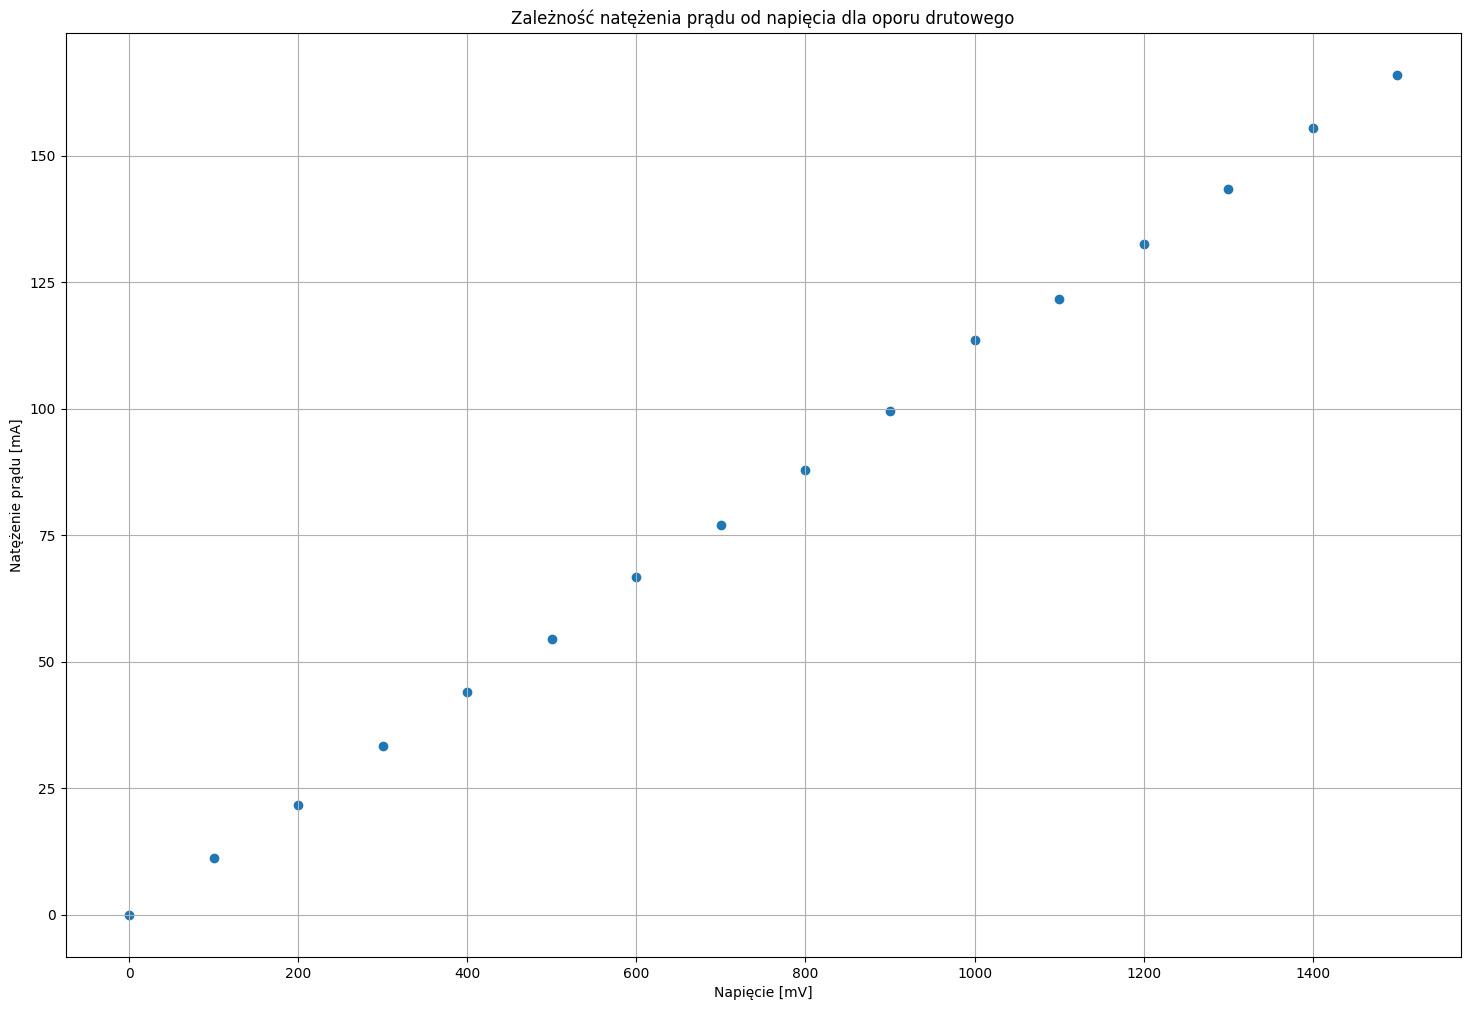

In [3]:
plt.figure(figsize=(18, 12))

plt.scatter(x_od, y_od)
plt.title("Zależność natężenia prądu od napięcia dla oporu drutowego")
plt.xlabel("Napięcie [mV]")
plt.ylabel("Natężenie prądu [mA]")
plt.grid(True)
plt.show()

## Wykres zależności dla oporu drutowego - regresja liniowa

a: 0.11100735294117647 b: -0.2117647058823479


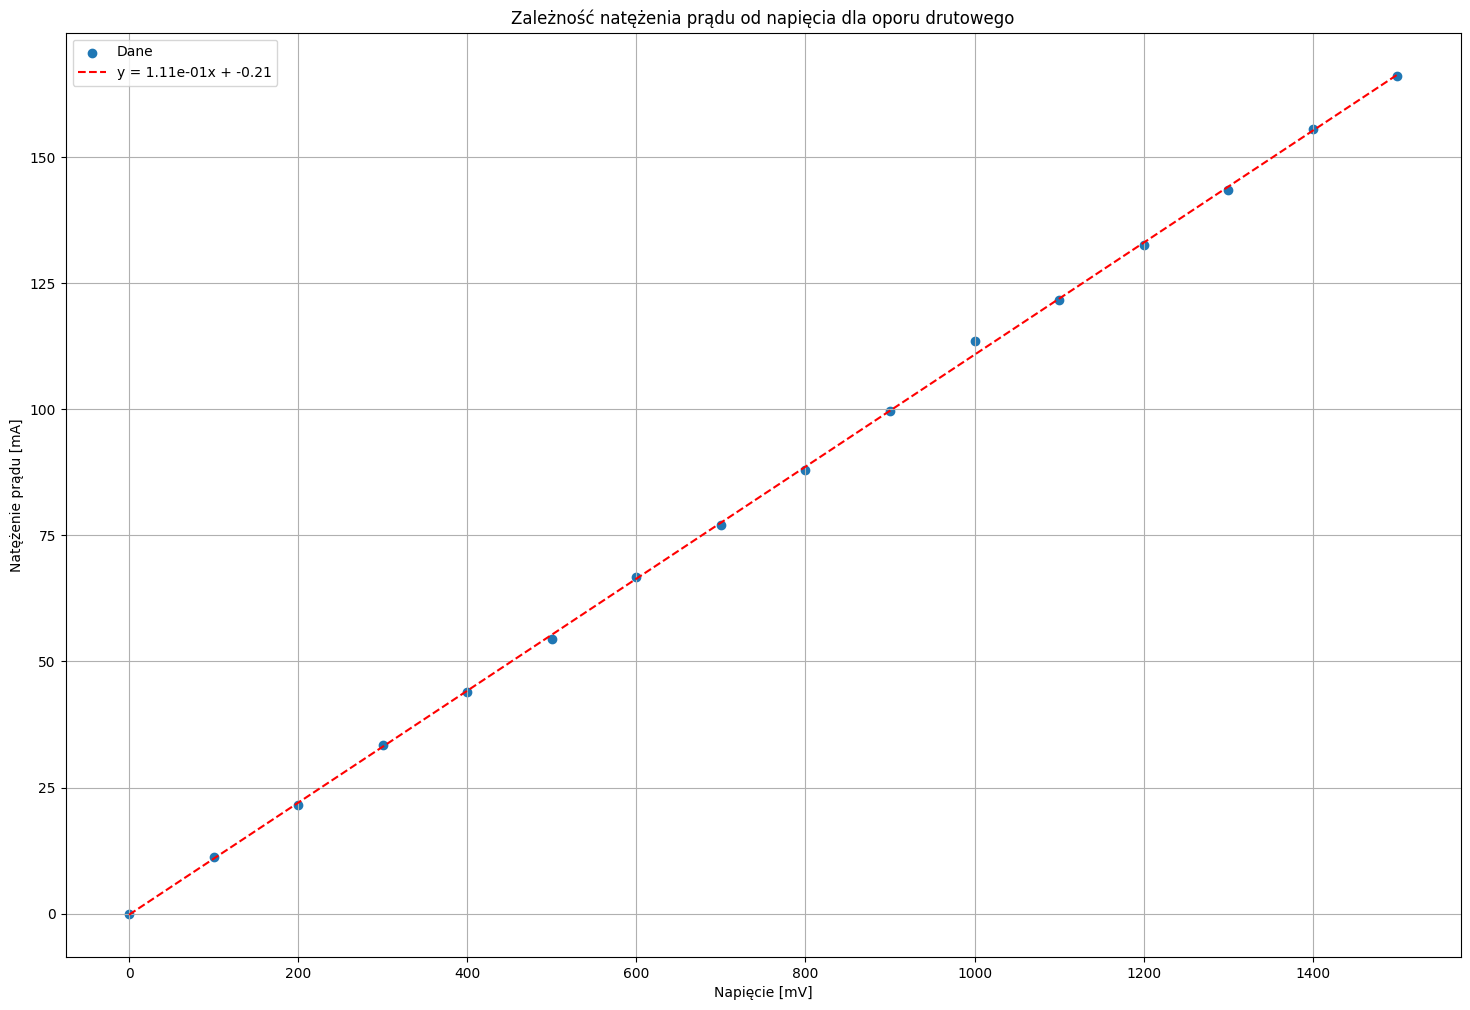

In [4]:
# Linear regression using numpy
a_od, b_od = np.polyfit(x_od, y_od, 1)
y_od_fit = a_od * x_od + b_od
print(f"a: {a_od} b: {b_od}")
plt.figure(figsize=(18, 12))
plt.scatter(x_od, y_od)
plt.plot(x_od, y_od_fit, 'r--')
plt.title("Zależność natężenia prądu od napięcia dla oporu drutowego")
plt.xlabel("Napięcie [mV]")
plt.ylabel("Natężenie prądu [mA]")
plt.legend(['Dane', f'y = {a_od:.2e}x + {b_od:.2f}'])
plt.grid(True)
plt.show()

## Wykres zależności dla oporu drutowego - paski błędów

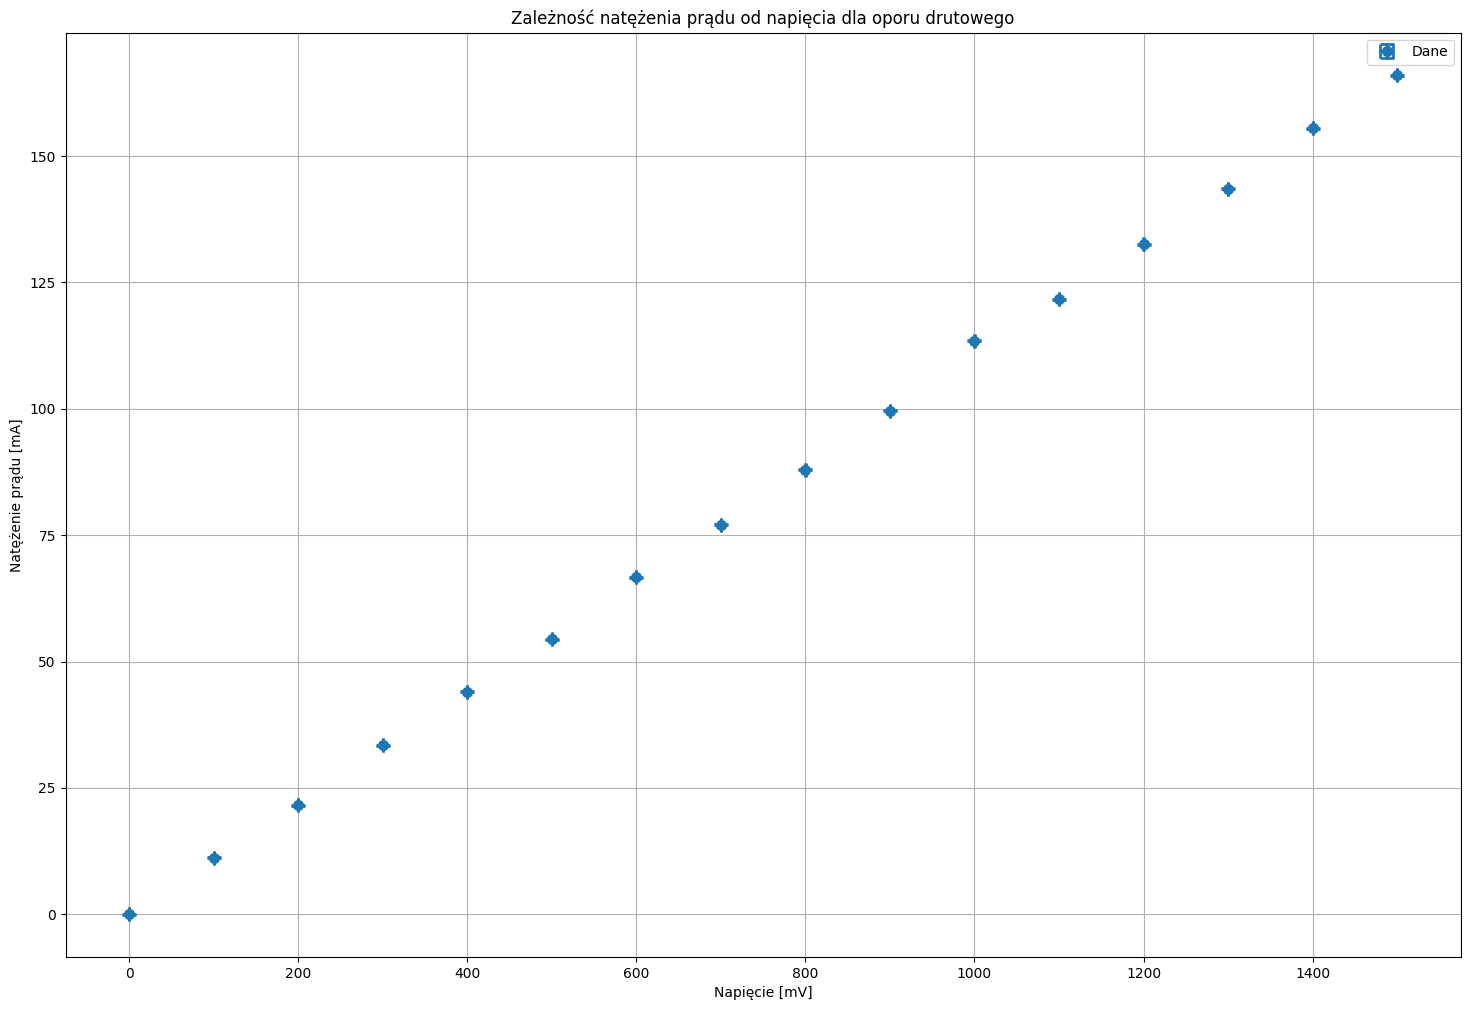

In [5]:
plt.figure(figsize=(18, 12))

plt.errorbar(x_od, y_od, xerr=du, yerr=di, fmt='o', capsize=5, elinewidth=2, markeredgewidth=2)
plt.title("Zależność natężenia prądu od napięcia dla oporu drutowego")
plt.xlabel("Napięcie [mV]")
plt.ylabel("Natężenie prądu [mA]")
plt.legend(['Dane'])
plt.grid(True)
plt.show()

## Wykres zależności dla diody prostowniczej

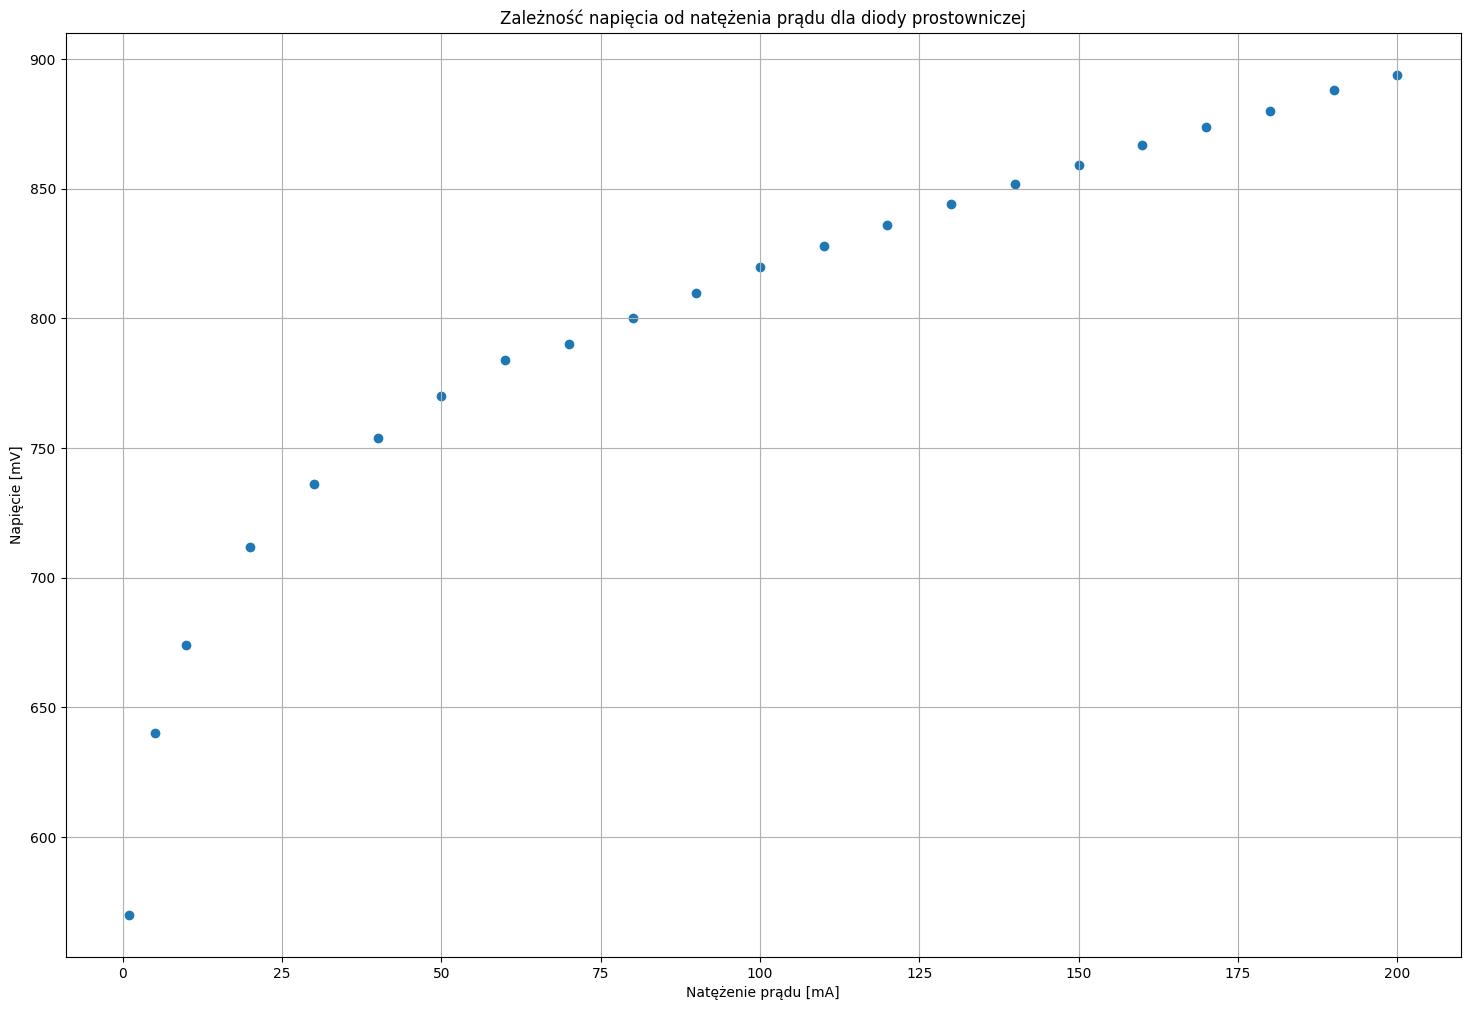

In [6]:
plt.figure(figsize=(18, 12))

plt.scatter(x_dp, y_dp)
plt.title("Zależność napięcia od natężenia prądu dla diody prostowniczej")
plt.xlabel("Natężenie prądu [mA]")
plt.ylabel("Napięcie [mV]")
plt.grid(True)
plt.show()

## Wykres zależności dla diody prostowniczej - regresja

a: 48.42035585684972 b: 558.4029229482749 c: 0.2555963929224947 d: 0.3901225346904227


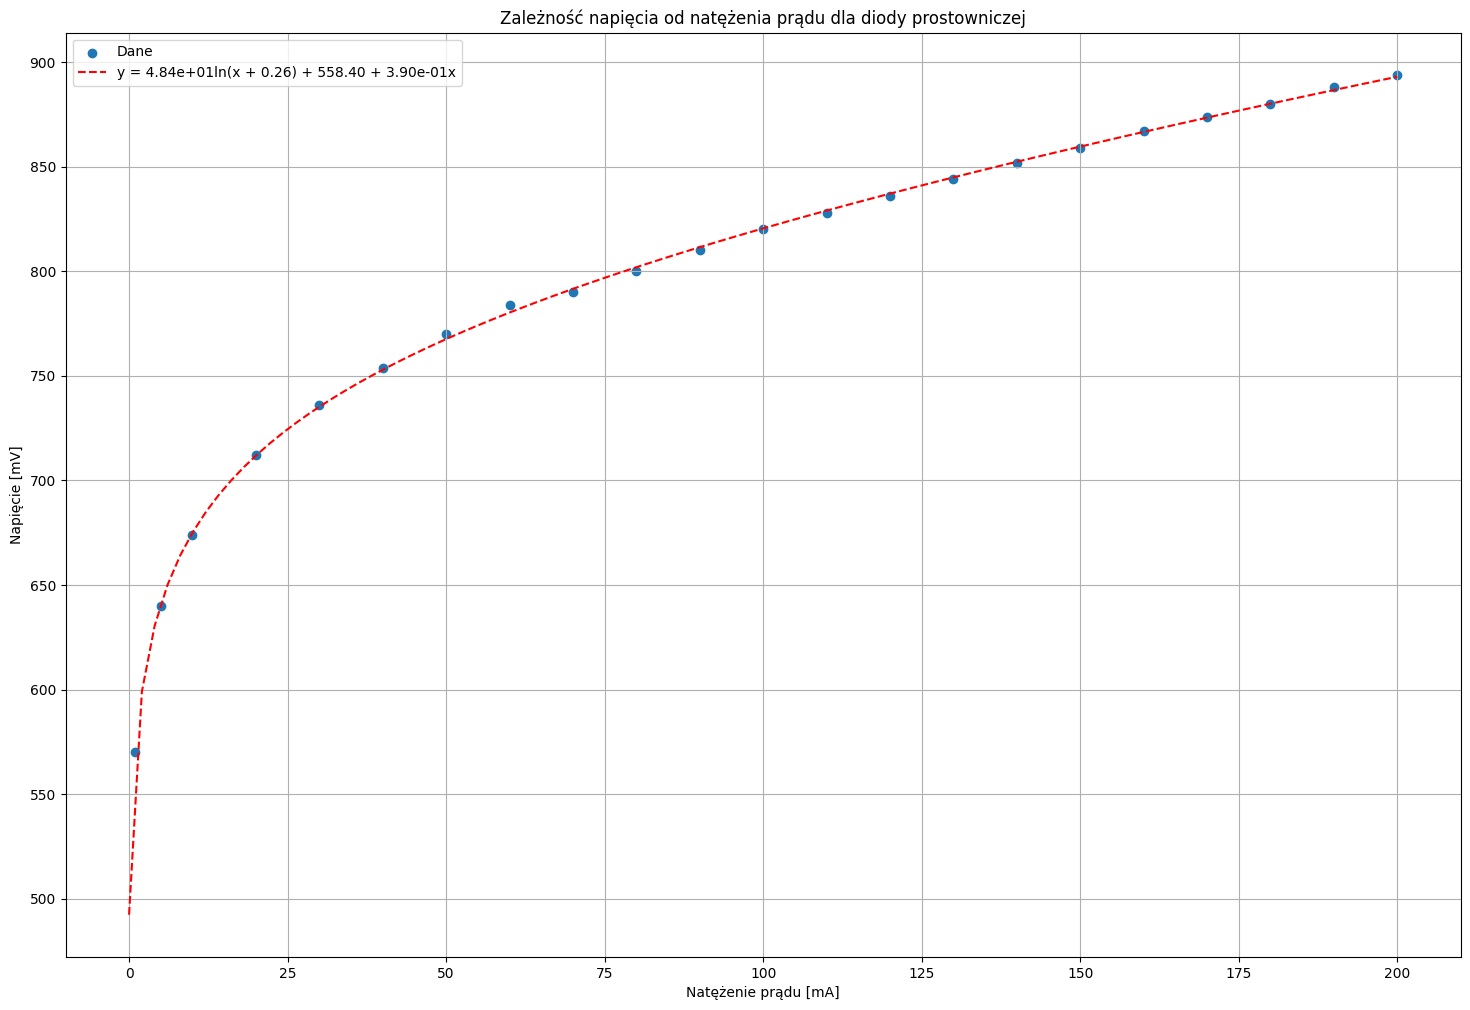

In [7]:
# Logarithmic regression
def diode_model(I, a, b, c, d):
    return a * np.log(I + c) + b + d * I

params, _ = curve_fit(diode_model, x_dp, y_dp, p0=[100, 500, 1, 0.1])
a_dp, b_dp, c_dp, d_dp, = params

print(f"a: {a_dp} b: {b_dp} c: {c_dp} d: {d_dp}")

I_dp_fit = np.linspace(0, 200, 100)
U_dp_fit = diode_model(I_dp_fit, a_dp, b_dp, c_dp, d_dp)

plt.figure(figsize=(18, 12))

plt.scatter(x_dp, y_dp)
plt.plot(I_dp_fit, U_dp_fit, 'r--')
plt.title("Zależność napięcia od natężenia prądu dla diody prostowniczej")
plt.xlabel("Natężenie prądu [mA]")
plt.ylabel("Napięcie [mV]")
plt.legend(['Dane', f'y = {a_dp:.2e}ln(x + {c_dp:.2f}) + {b_dp:.2f} + {d_dp:.2e}x'])
plt.grid(True)
plt.show()

## Wykres zależności dla diody prostowniczej - paski błędów

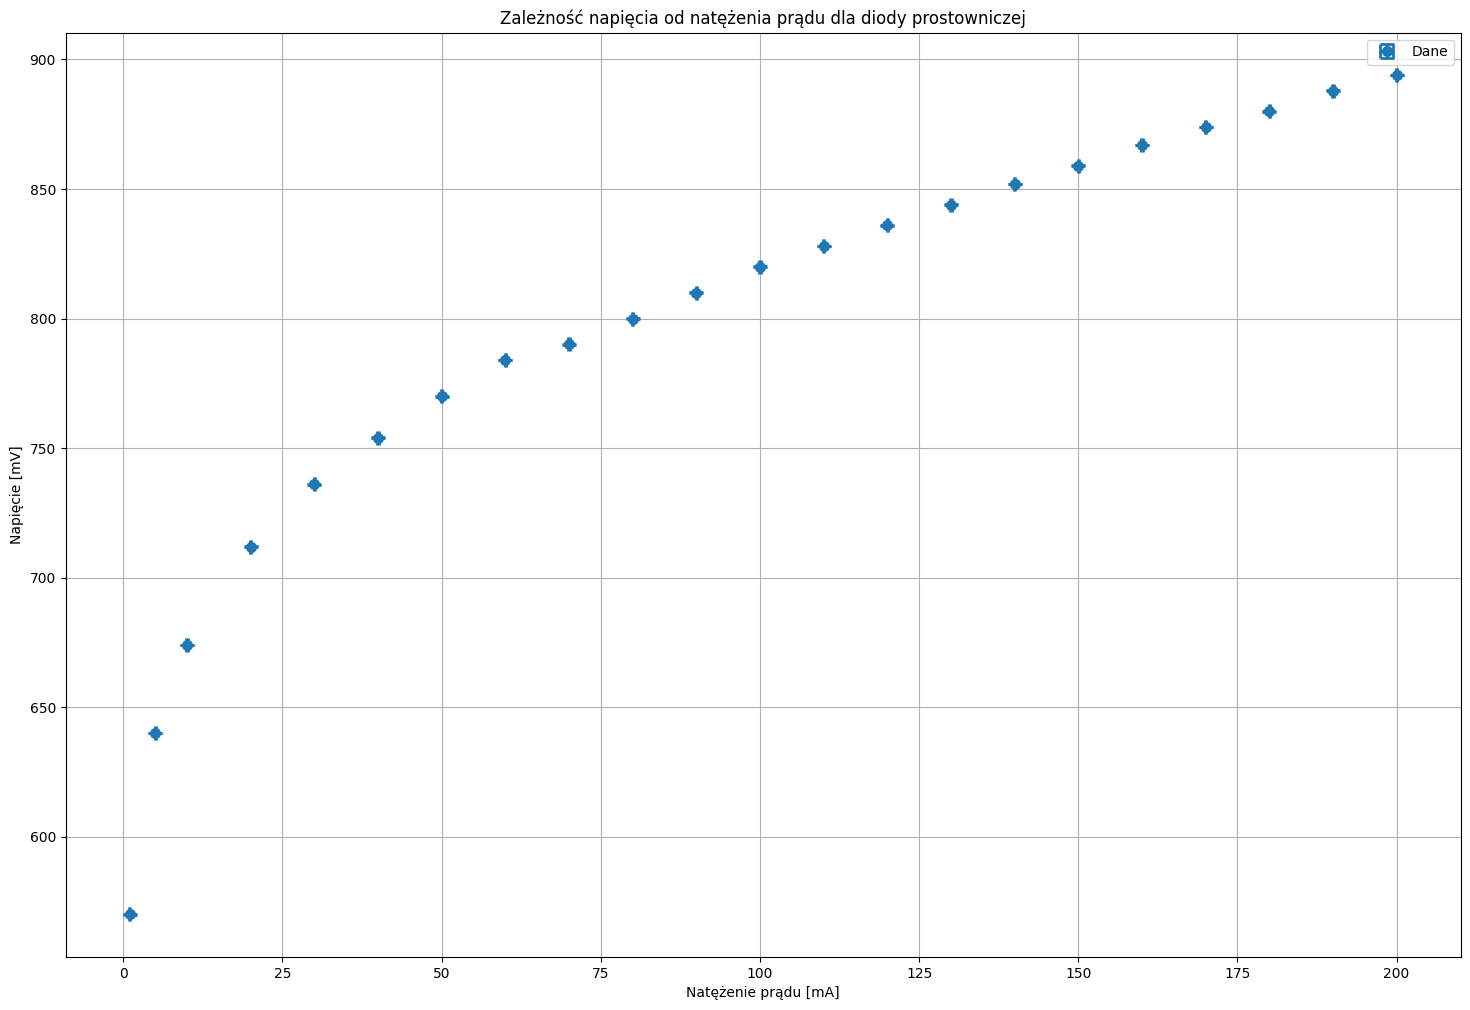

In [8]:
plt.figure(figsize=(18, 12))

plt.errorbar(x_dp, y_dp, xerr=du, yerr=di, fmt='o', capsize=5, elinewidth=2, markeredgewidth=2)
plt.title("Zależność napięcia od natężenia prądu dla diody prostowniczej")
plt.xlabel("Natężenie prądu [mA]")
plt.ylabel("Napięcie [mV]")
plt.legend(['Dane'])
plt.grid(True)
plt.show()

## Wykres zależności dla żarówki

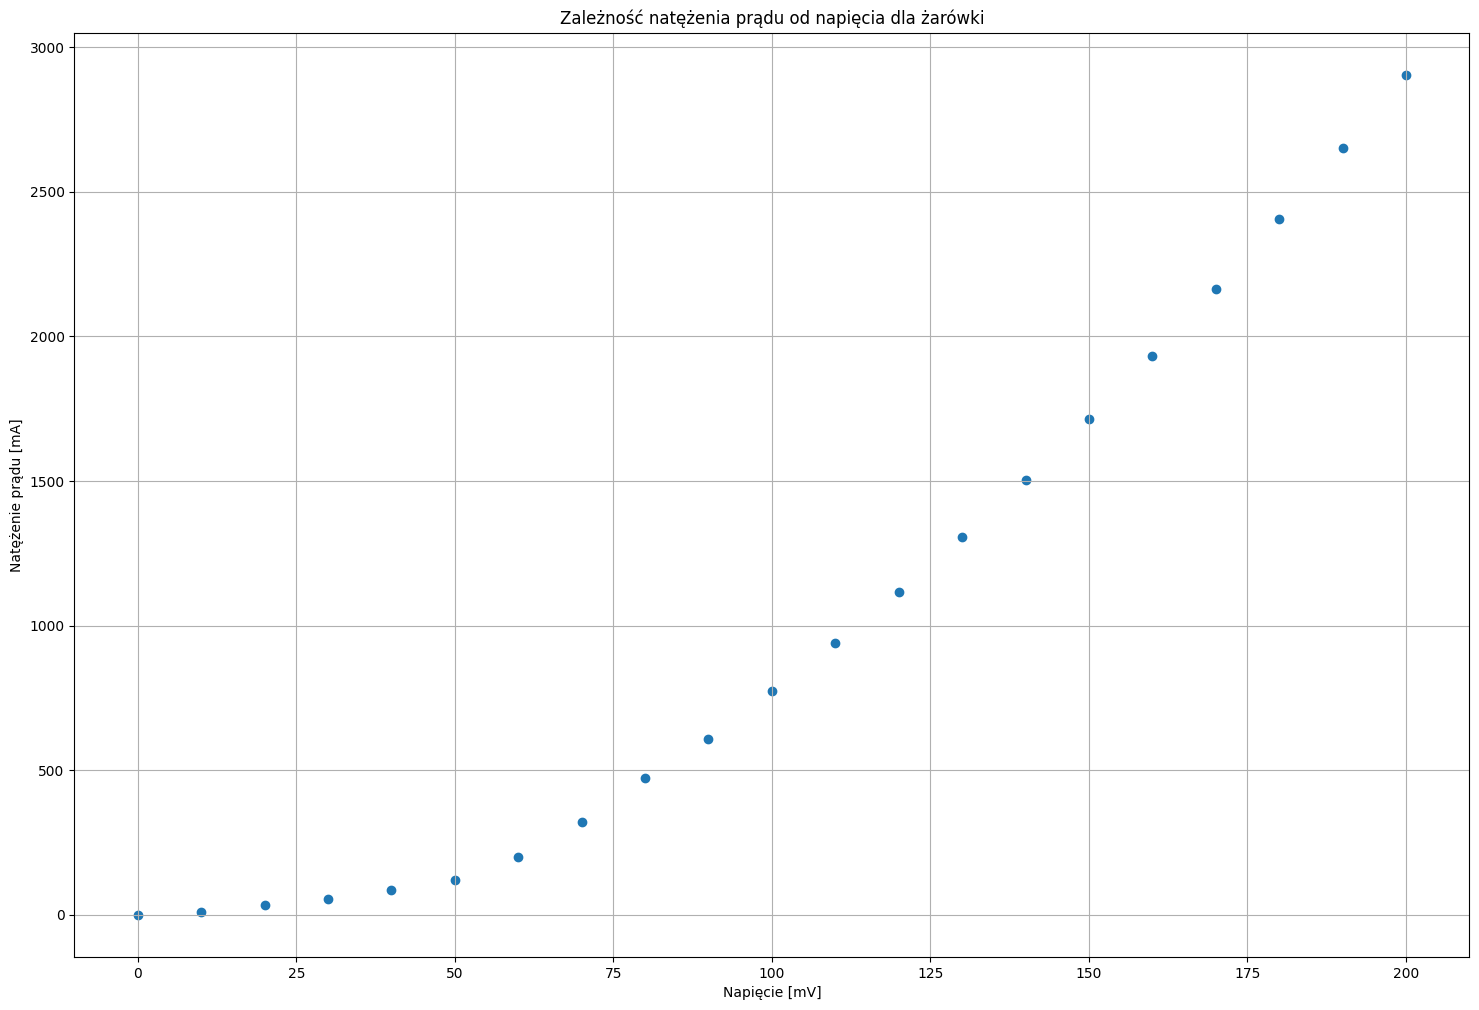

In [9]:
plt.figure(figsize=(18, 12))

plt.scatter(x_z, y_z)
plt.title("Zależność natężenia prądu od napięcia dla żarówki")
plt.xlabel("Napięcie [mV]")
plt.ylabel("Natężenie prądu [mA]")
plt.grid(True)
plt.show()

## Wykres zależności dla żarówki - regresja

a: 1.9545333055232457 k: 0.09394286365842665


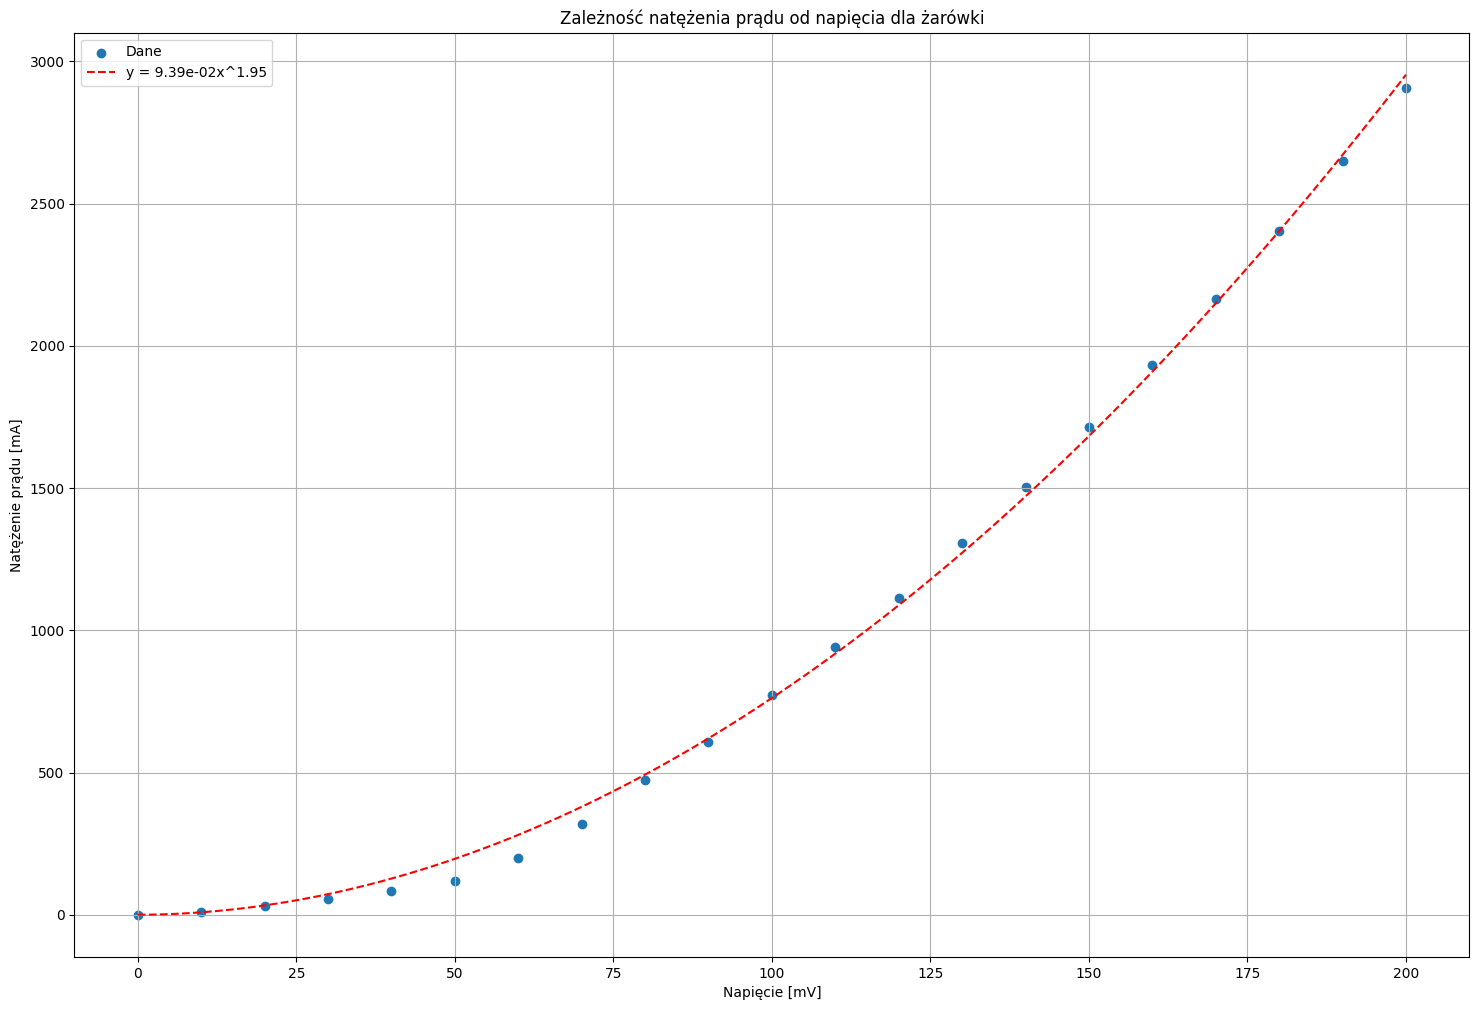

In [21]:
# Polynomial regression
def bulb_model(I, k, a):
    return k * I**a


params, _ = curve_fit(bulb_model, x_z, y_z, p0=[0.1, 1.5])
k_z, a_z= params
print(f"a: {a_z} k: {k_z}")

x_z_fit = np.linspace(0, 200, 100)
y_z_fit = bulb_model(x_z_fit, k_z, a_z)
plt.figure(figsize=(18, 12))

plt.scatter(x_z, y_z)
plt.plot(x_z_fit, y_z_fit, 'r--')
plt.title("Zależność natężenia prądu od napięcia dla żarówki")
plt.xlabel("Napięcie [mV]")
plt.ylabel("Natężenie prądu [mA]")
plt.legend(['Dane', f'y = {k_z:.2e}x^{a_z:.2f}'])
plt.grid(True)
plt.show()

## Wykres zależności dla żarówki - paski błędów

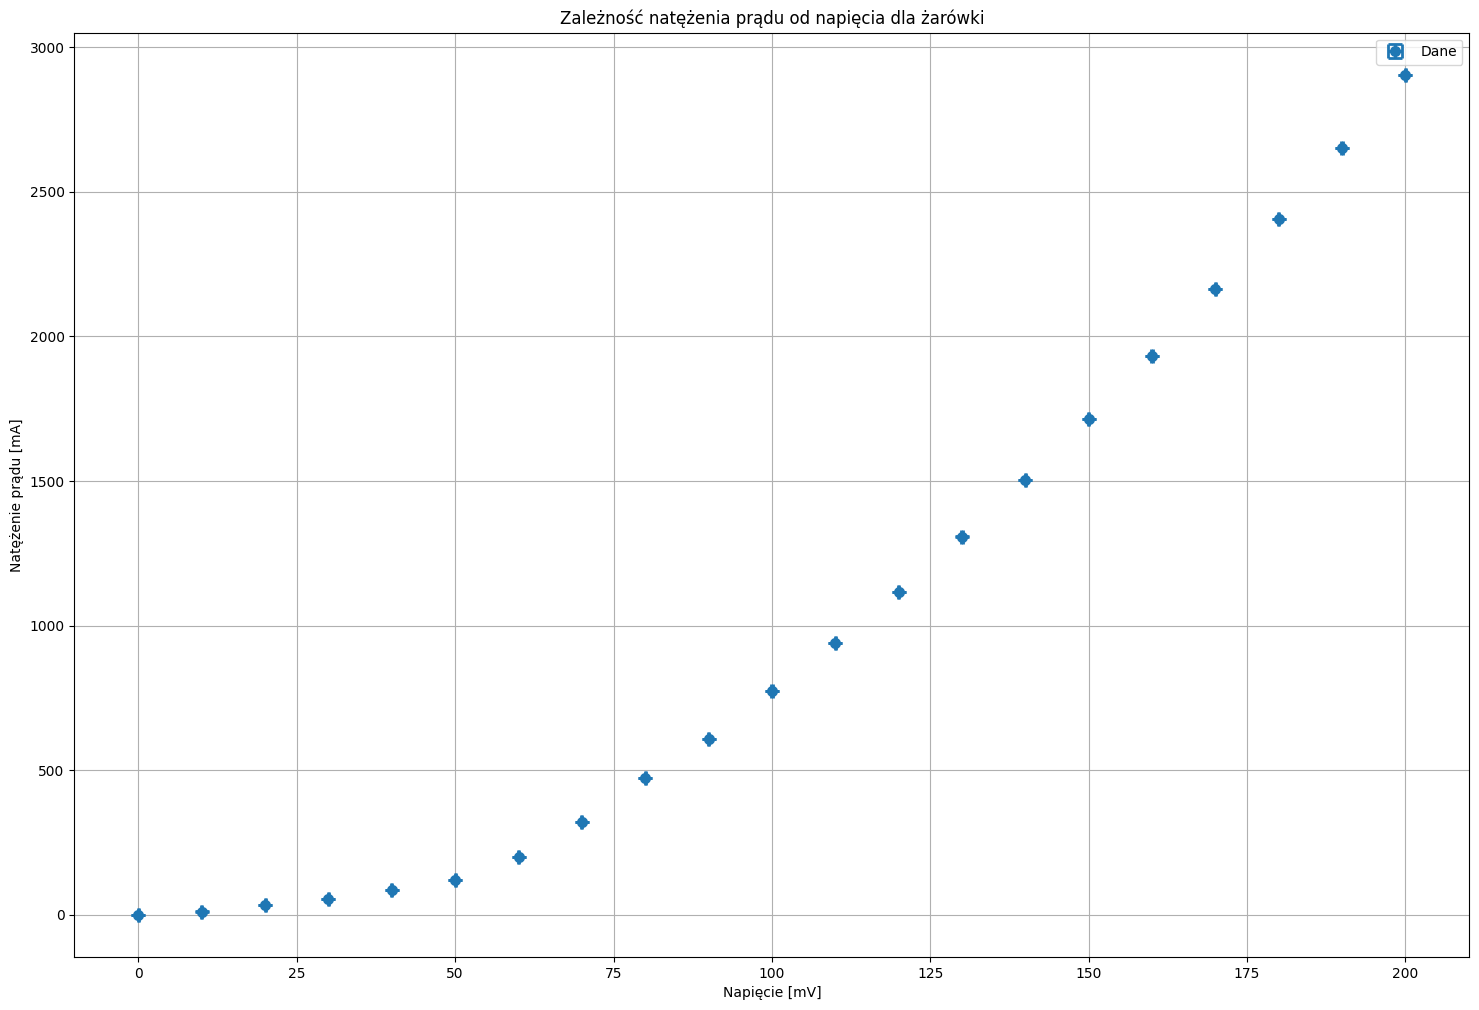

In [11]:
plt.figure(figsize=(18, 12))

plt.errorbar(x_z, y_z, xerr=du, yerr=di, fmt='o', capsize=5, elinewidth=2, markeredgewidth=2)
plt.title("Zależność natężenia prądu od napięcia dla żarówki")
plt.xlabel("Napięcie [mV]")
plt.ylabel("Natężenie prądu [mA]")
plt.legend(['Dane'])
plt.grid(True)
plt.show()

## Wykres zależności dla termistora

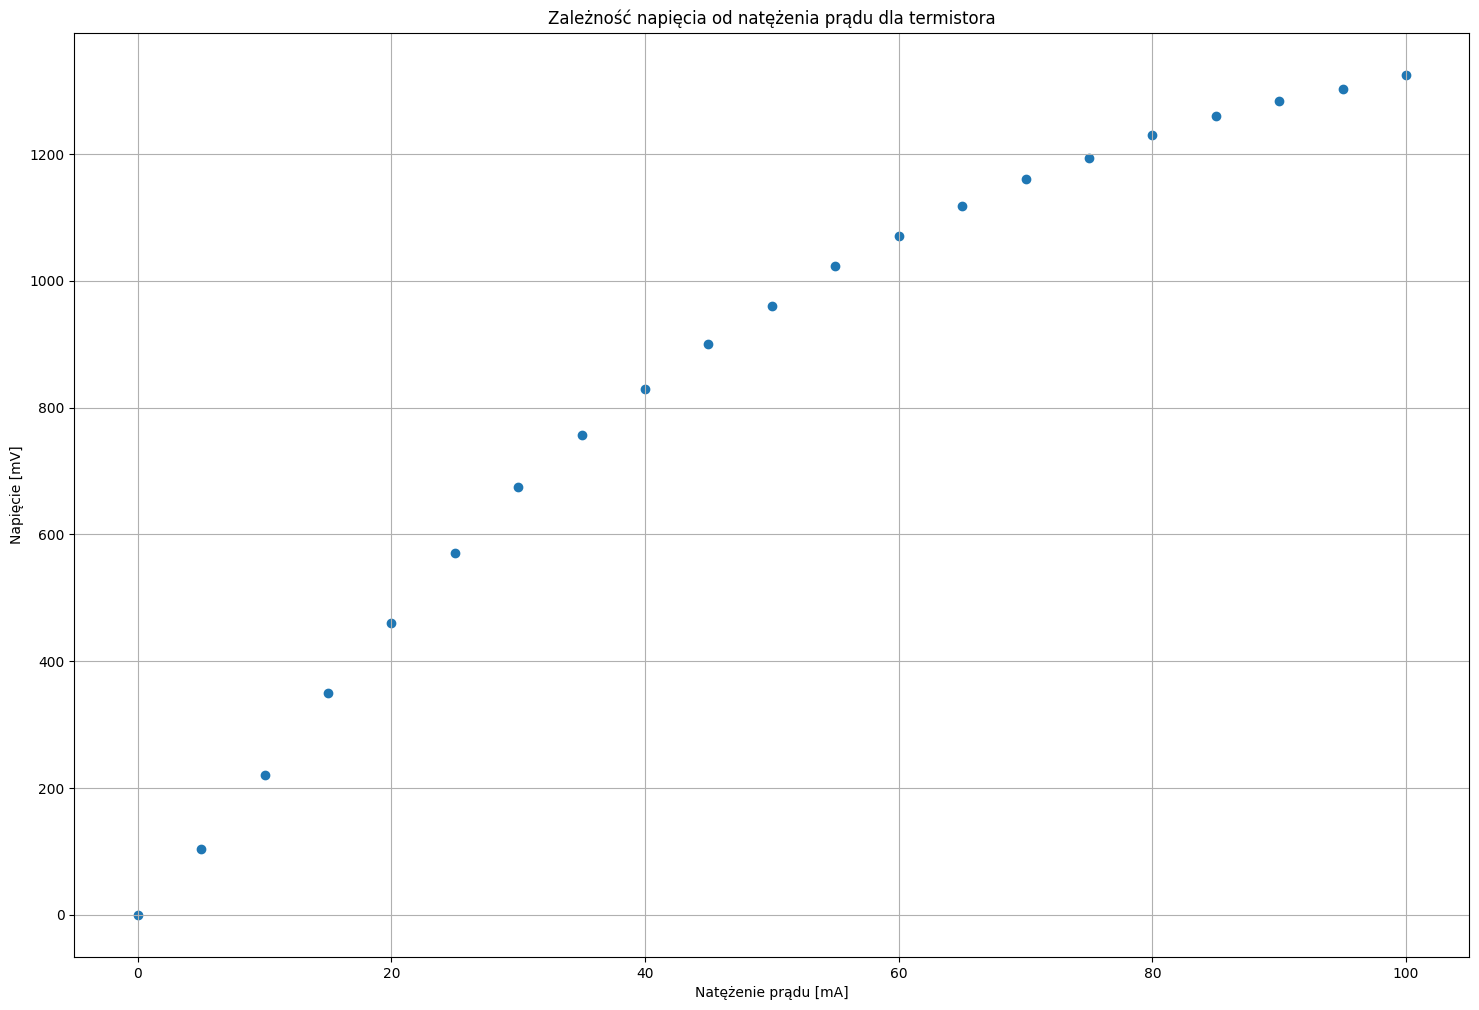

In [12]:
plt.figure(figsize=(18, 12))

plt.scatter(x_t, y_t)
plt.title("Zależność napięcia od natężenia prądu dla termistora")
plt.xlabel("Natężenie prądu [mA]")
plt.ylabel("Napięcie [mV]")
plt.grid(True)
plt.show()

## Wykres zależności dla termistora - regresja

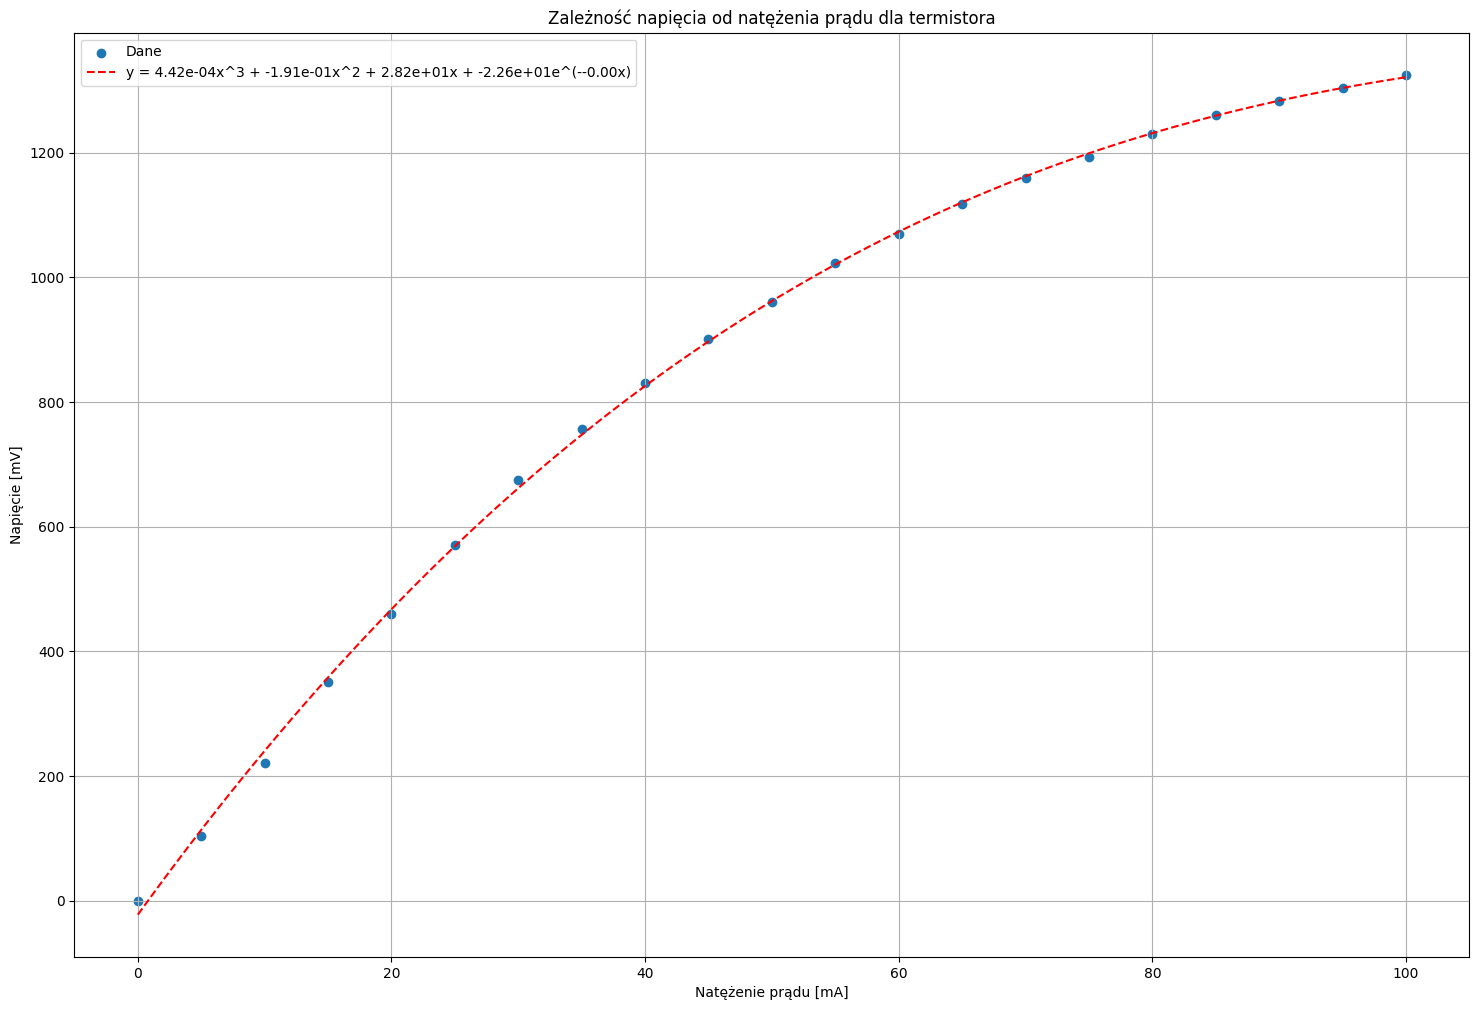

In [13]:
# Polynomial regression
def thermistor_model(I, a, b, c, d, k):
    return a * I**3 + b * I**2 + c * I + d * np.exp(-k * I)

params, _ = curve_fit(thermistor_model, x_t, y_t, p0=[1e-3, -1e-1, 10, 1000, 0.01])
a_t, b_t, c_t, d_t, k_t = params

I_t_fit = np.linspace(0, 100, 100)
U_t_fit = thermistor_model(I_t_fit, a_t, b_t, c_t, d_t, k_t)

plt.figure(figsize=(18, 12))
plt.scatter(x_t, y_t)
plt.plot(I_t_fit, U_t_fit, 'r--')
plt.title("Zależność napięcia od natężenia prądu dla termistora")
plt.xlabel("Natężenie prądu [mA]")
plt.ylabel("Napięcie [mV]")
plt.legend(['Dane', f'y = {a_t:.2e}x^3 + {b_t:.2e}x^2 + {c_t:.2e}x + {d_t:.2e}e^(-{k_t:.2f}x)'])
plt.grid(True)
plt.show()

## Wykres zależności dla termistora - paski błędów

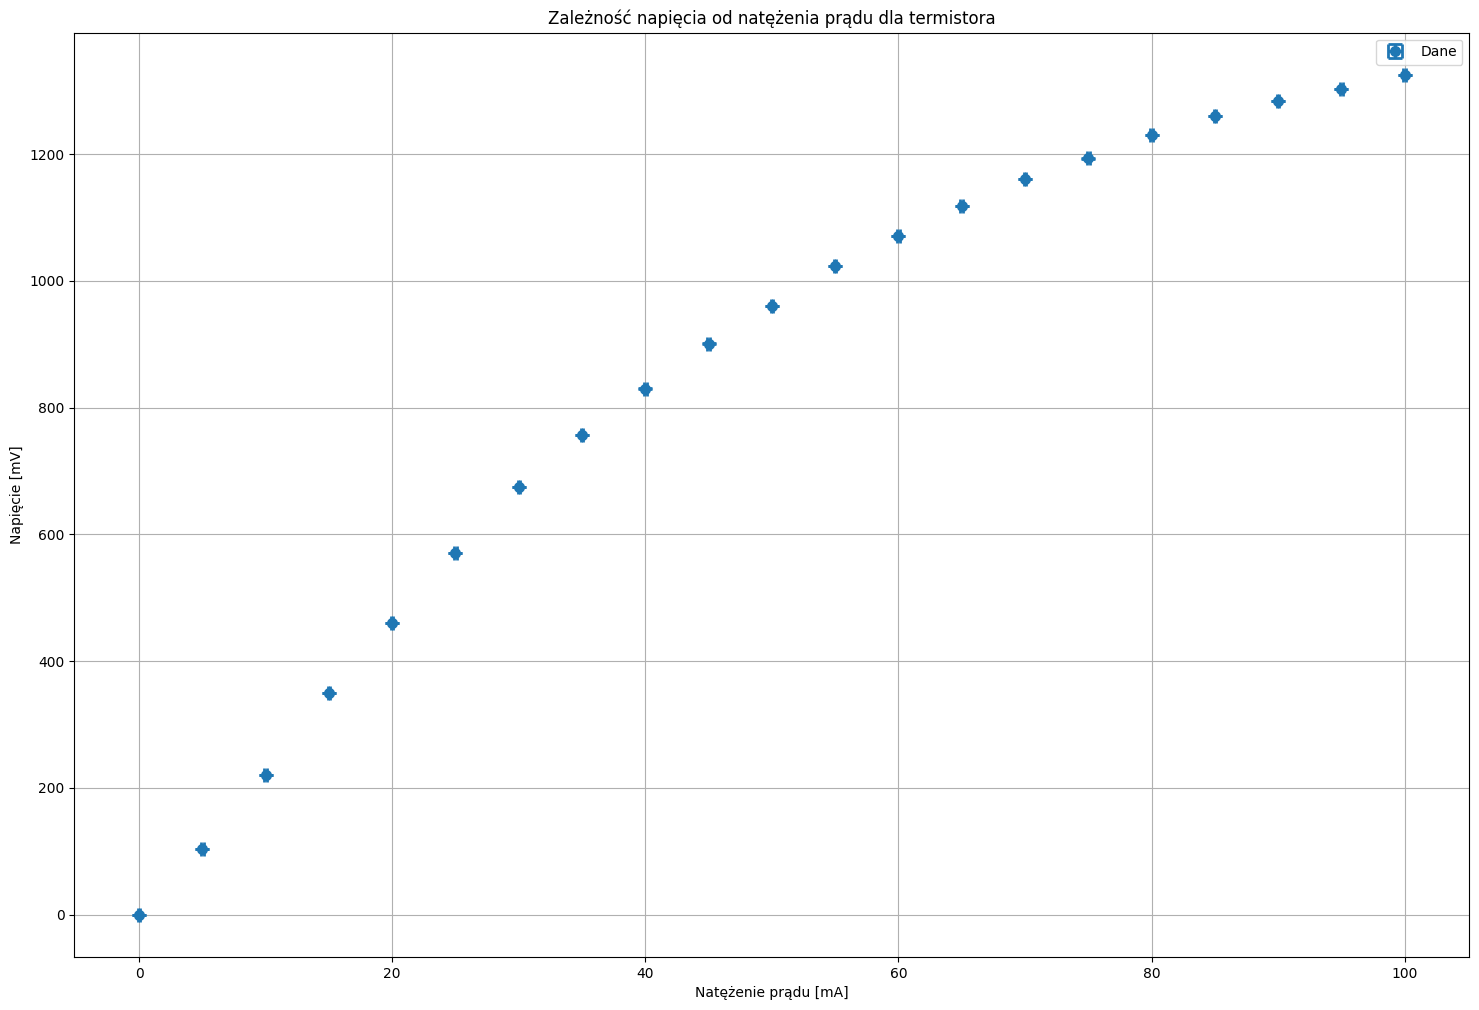

In [14]:
plt.figure(figsize=(18, 12))

plt.errorbar(x_t, y_t, xerr=du, yerr=di, fmt='o', capsize=5, elinewidth=2, markeredgewidth=2)
plt.title("Zależność napięcia od natężenia prądu dla termistora")
plt.xlabel("Natężenie prądu [mA]")
plt.ylabel("Napięcie [mV]")
plt.legend(['Dane'])
plt.grid(True)
plt.show()

## Wyznaczenie oporu różniczkowego żarówki

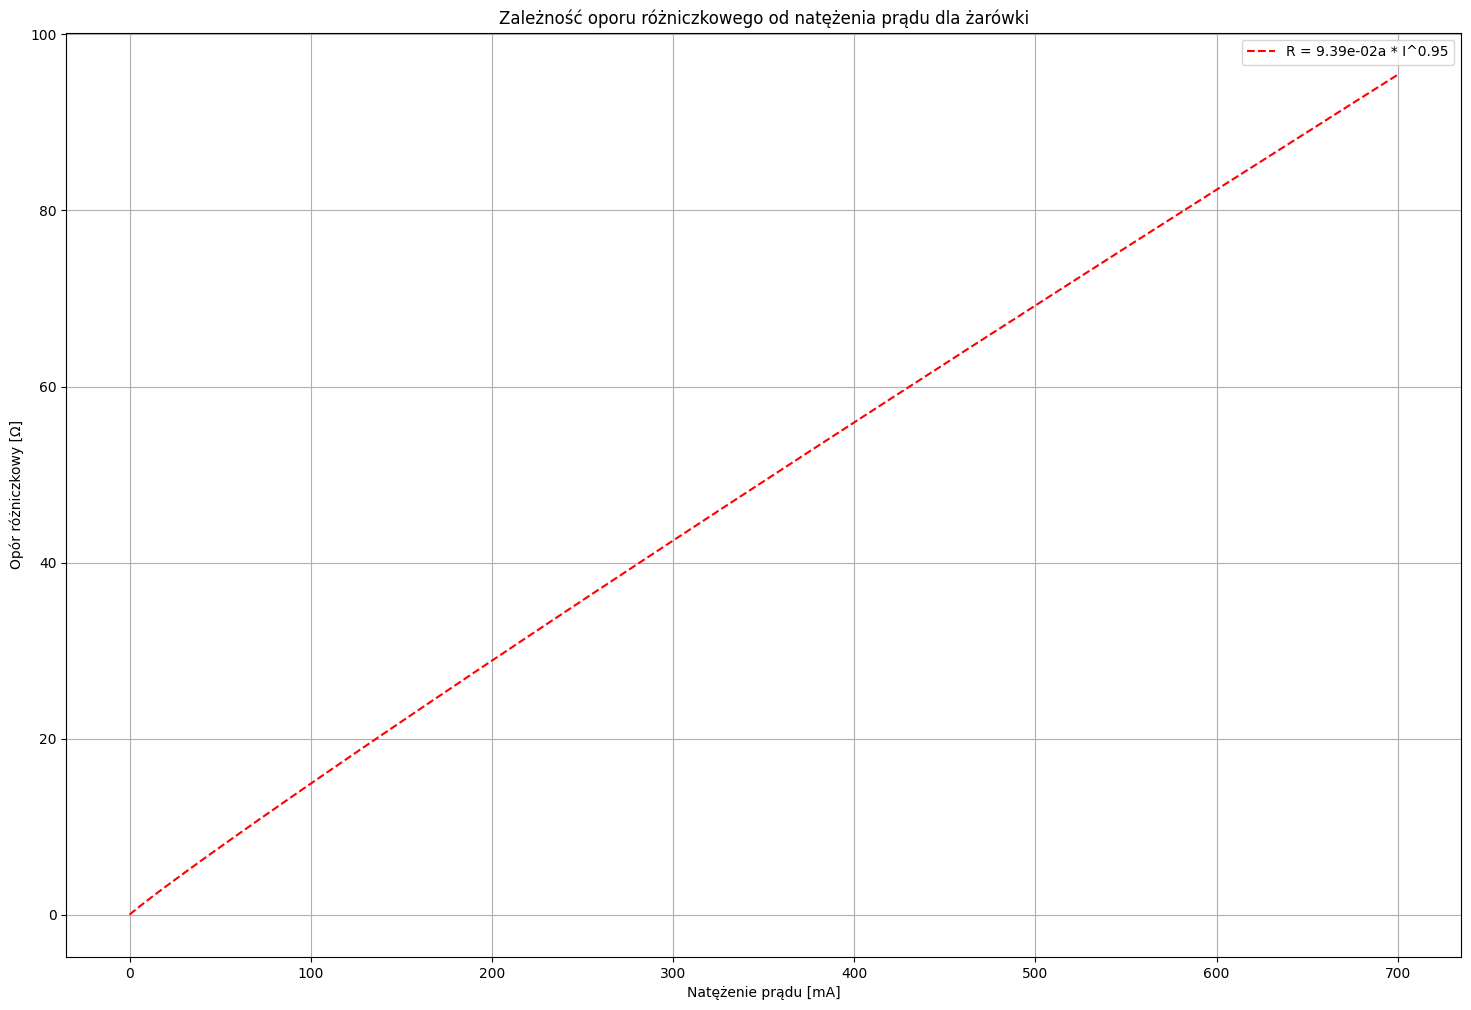

In [15]:
def R_diff(I, k, a):
    return k * a * I**(a - 1)

I_smooth = np.linspace(min(x_z), 700, 1000)
V_smooth = bulb_model(I_smooth, k_z, a_z)
R_diff_smooth = R_diff(I_smooth, k_z, a_z)

plt.figure(figsize=(18, 12))

plt.plot(I_smooth, R_diff_smooth, 'r--')
plt.title("Zależność oporu różniczkowego od natężenia prądu dla żarówki")
plt.xlabel("Natężenie prądu [mA]")
plt.ylabel("Opór różniczkowy [Ω]")
plt.legend([f'R = {k_z:.2e}a * I^{a_z - 1:.2f}'])
plt.grid(True)
plt.show()

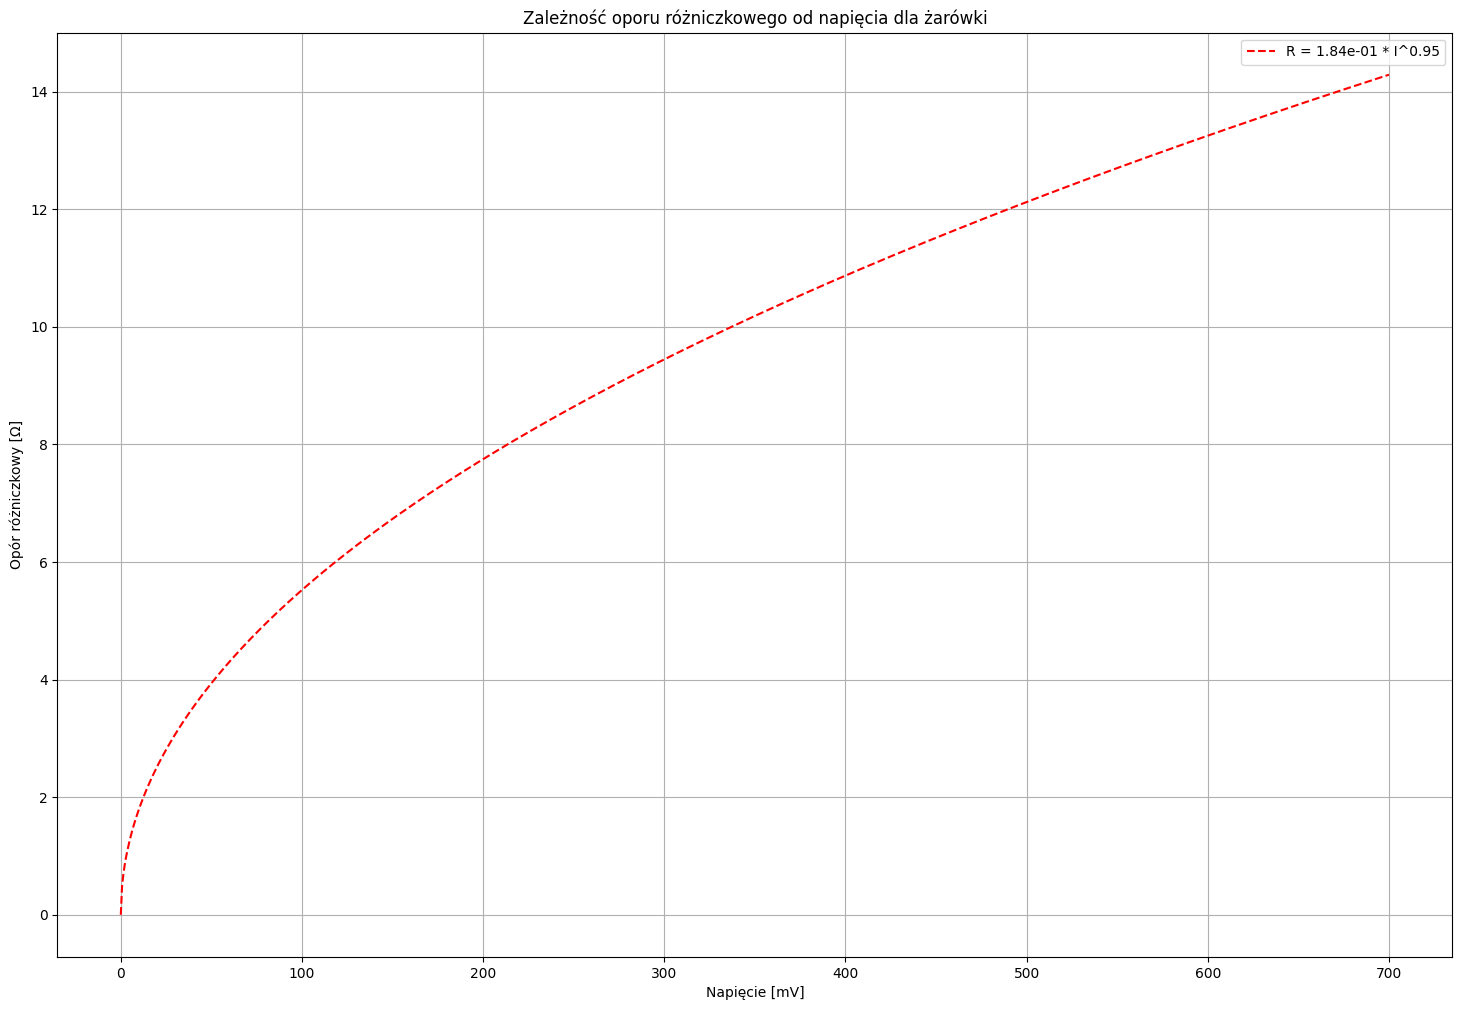

Opór różniczkowy dla 600mv: 13.25 Ω


In [20]:
def current_from_voltage(V, k, a):
    return (V/k)**(1/a)

def R_diff_U(I, k, a):
    return k * a * I**(a - 1)

V_smooth_U = np.linspace(min(x_z), 700, 1000)
I_smooth_U = current_from_voltage(V_smooth_U, k_z, a_z)
R_diff_smooth_U = R_diff_U(I_smooth_U, k_z, a_z)

plt.figure(figsize=(18, 12))

plt.plot(V_smooth_U, R_diff_smooth_U, 'r--')
plt.title("Zależność oporu różniczkowego od napięcia dla żarówki")
plt.xlabel("Napięcie [mV]")
plt.ylabel("Opór różniczkowy [Ω]")
plt.legend([f'R = {k_z*a_z:.2e} * I^{a_z - 1:.2f}'])
plt.grid(True)
plt.show()

# Opór różniczkowy dla 600mv
I_600 = current_from_voltage(600, k_z, a_z)
R_600 = R_diff(I_600, k_z, a_z)
print(f"Opór różniczkowy dla 600mv: {R_600:.2f} Ω")

## Obliczenia dla oporu drutowego

In [19]:
n = len(x_od)
residua = y_od - y_od_fit

S_y = np.sqrt(np.sum(residua ** 2)/(n - 2))

sum_x = np.sum(x_od)
sum_x2 = np.sum(x_od ** 2)
D = n * sum_x2 - sum_x ** 2

u_a = S_y * np.sqrt(n/D)

print(f"u_a: {u_a:.2e} A/V")

u_a: 4.59e-04 A/V
